In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Column names based on the project description
column_names = [
    "Loan_ID", "Gender", "Married", "Dependents", "Education", "Self_Employed",
    "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term",
    "Credit_History", "Property_Area", "Loan_Status"
]

In [5]:
df = pd.read_csv("loan_prediction.csv", header=None, names=column_names)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This dataset contain 613 rows and 13 columnns, out of which 1 is our independent variable i.e loan status and other 12 are dependent variables.

In [6]:
#Handle missing values, encode categorical variables, and scale numerical variables
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Handling missing values
imputer = SimpleImputer(strategy='mean')
df['LoanAmount'] = imputer.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term'] = imputer.fit_transform(df[['Loan_Amount_Term']])
df['Credit_History'] = imputer.fit_transform(df[['Credit_History']])

# For categorical variables, fill missing values with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Convert Dependents to numerical
df['Dependents'] = df['Dependents'].replace({'3+': 3}).astype(int)

# Convert target variable to numerical
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [7]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
dtype: object

There are 3 different type of data(int34, float64 and object) present in the dataset.

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There is no null value present in the dataset.

In [9]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11


In [10]:
print('Total Duplicated Rows are ',df.duplicated().sum())

Total Duplicated Rows are  0


In [11]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


From the above discription we can observe the following things: The counts of all the columns are same which means there is no missing values in the dataset.
Count: 614
Mean: 0.818 (approx. 82% of the applicants are male since typically, 1 represents male and 0 represents female in such datasets)
Loan Approval Rate: The gender distribution might suggest that a majority of applicants are male. Since Loan_Status has a mean of 0.687, approximately 69% of the loans were approved. It would be insightful to further investigate the approval rate specifically for each gender.

Loan_Status
1    422
0    192
Name: count, dtype: int64


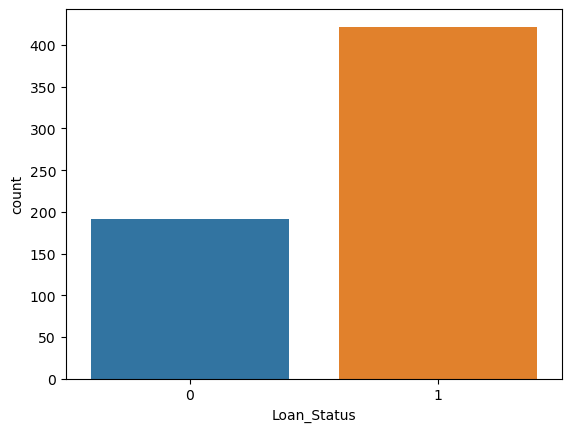

In [12]:
ax = sns.countplot(x='Loan_Status', data=df)
print(df['Loan_Status'].value_counts())

In this dataset approval rates are higher than denial rate.

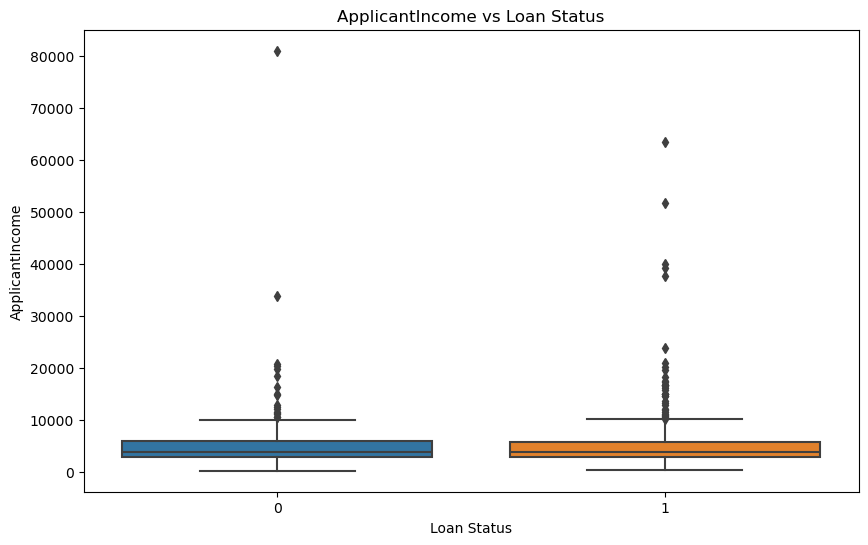

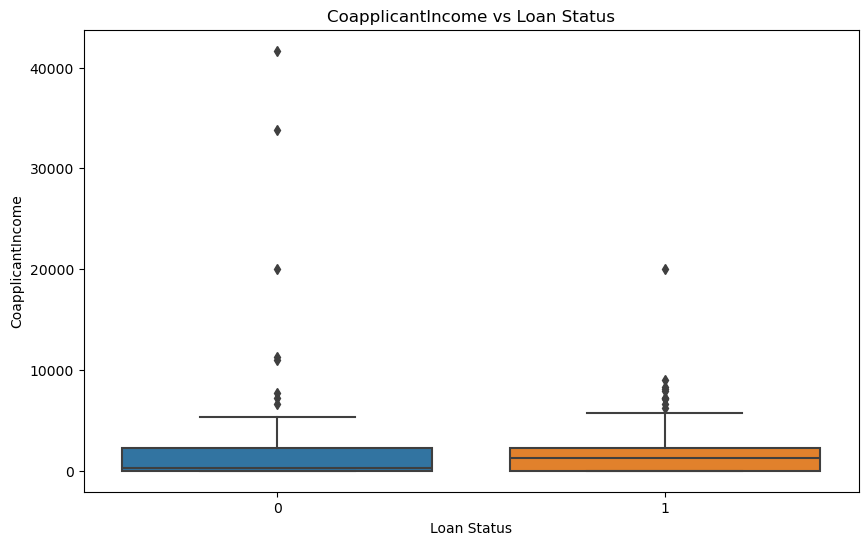

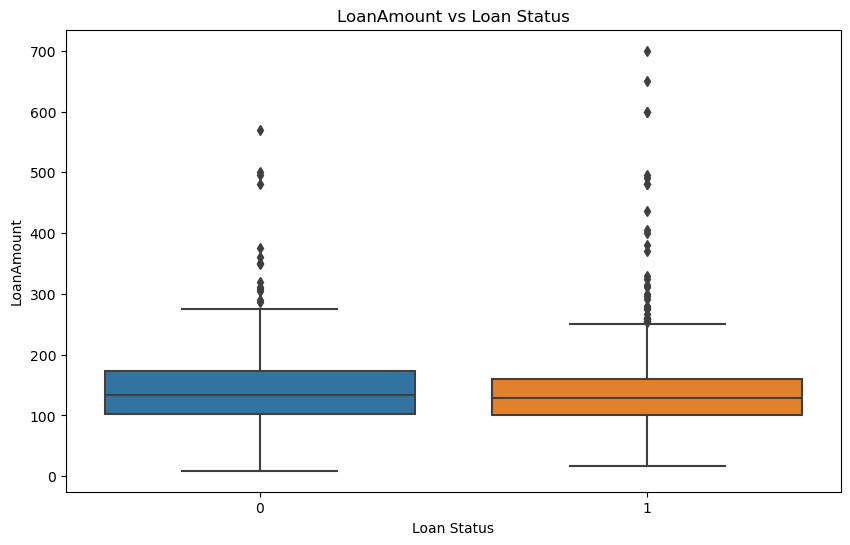

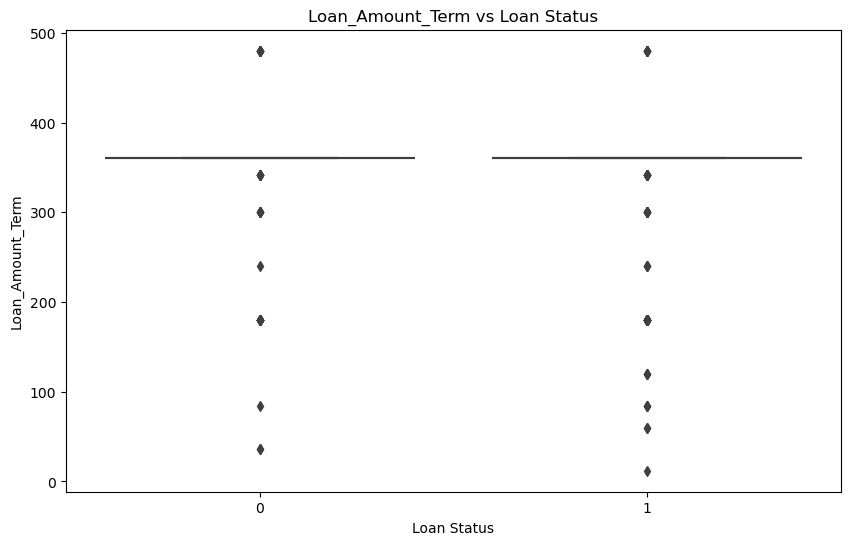

AttributeError: 'numpy.int64' object has no attribute 'startswith'

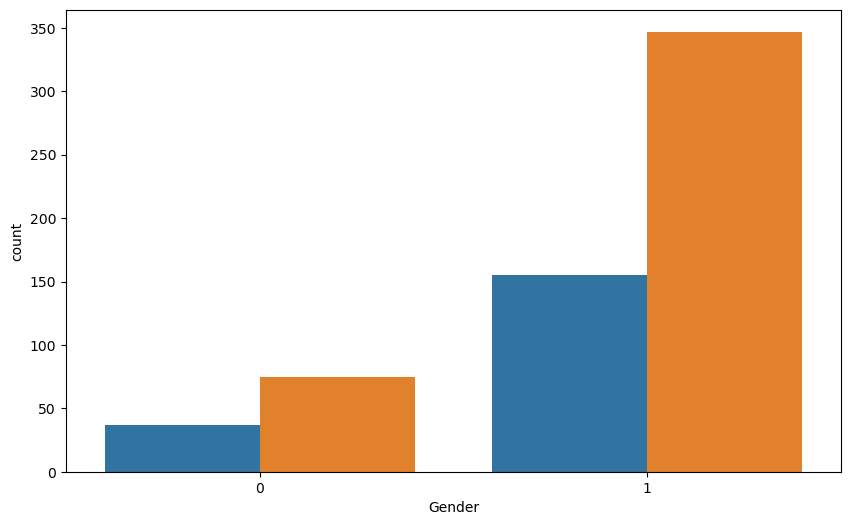

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the relationship between numerical features and target
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Loan_Status'], y=df[feature])
    plt.title(f'{feature} vs Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(feature)
    plt.show()

# Plotting the relationship between categorical features and target
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature], hue=df['Loan_Status'])
    plt.title(f'{feature} vs Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


In [14]:
df.drop("Loan_ID", axis=1, inplace =True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


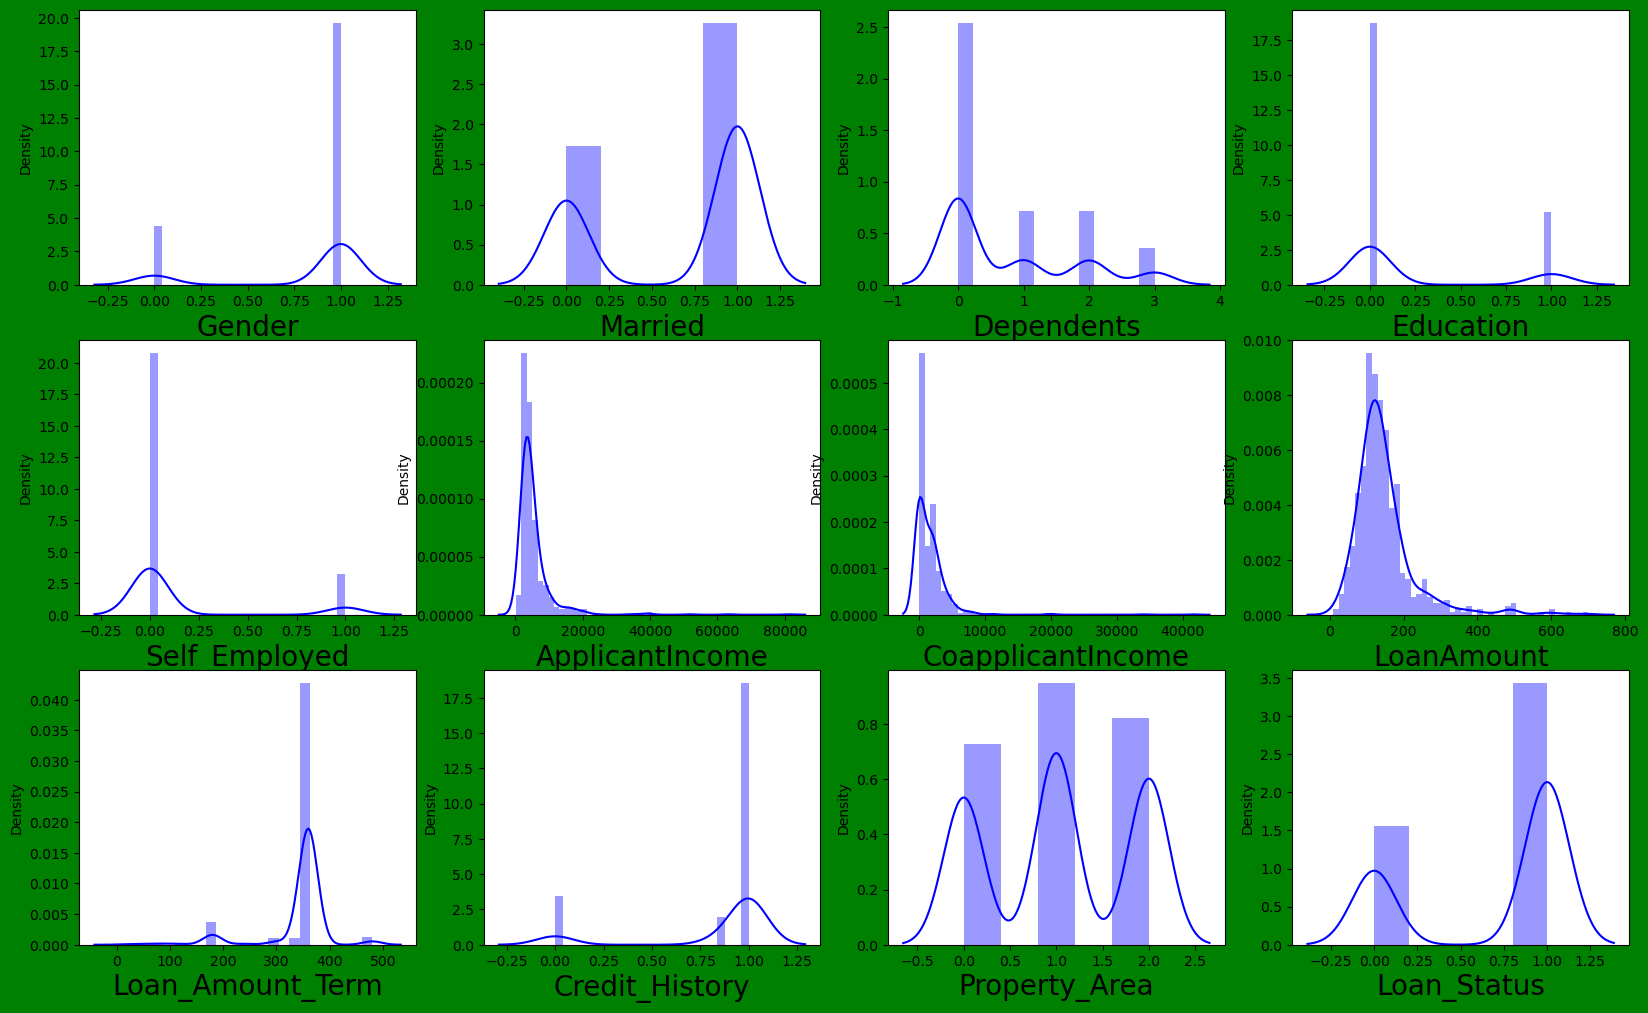

In [15]:
plt.figure(figsize=(20,25), facecolor="green")
plotnumber = 1
for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column], color ='b')
        plt.xlabel(column, fontsize= 20)
    plotnumber+=1
plt.show()

In [16]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [17]:
df['Self_Employed']= np.cbrt(df['Self_Employed'])

In [18]:
df['ApplicantIncome']= np.cbrt(df['ApplicantIncome'])

In [19]:
df['CoapplicantIncome']= np.cbrt(df['CoapplicantIncome'])

In [20]:
df['LoanAmount']= np.cbrt(df['LoanAmount'])

In [21]:
df['Loan_Amount_Term']= np.cbrt(df['Loan_Amount_Term'])

In [22]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -3.573315
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Now we corrected the skewness.

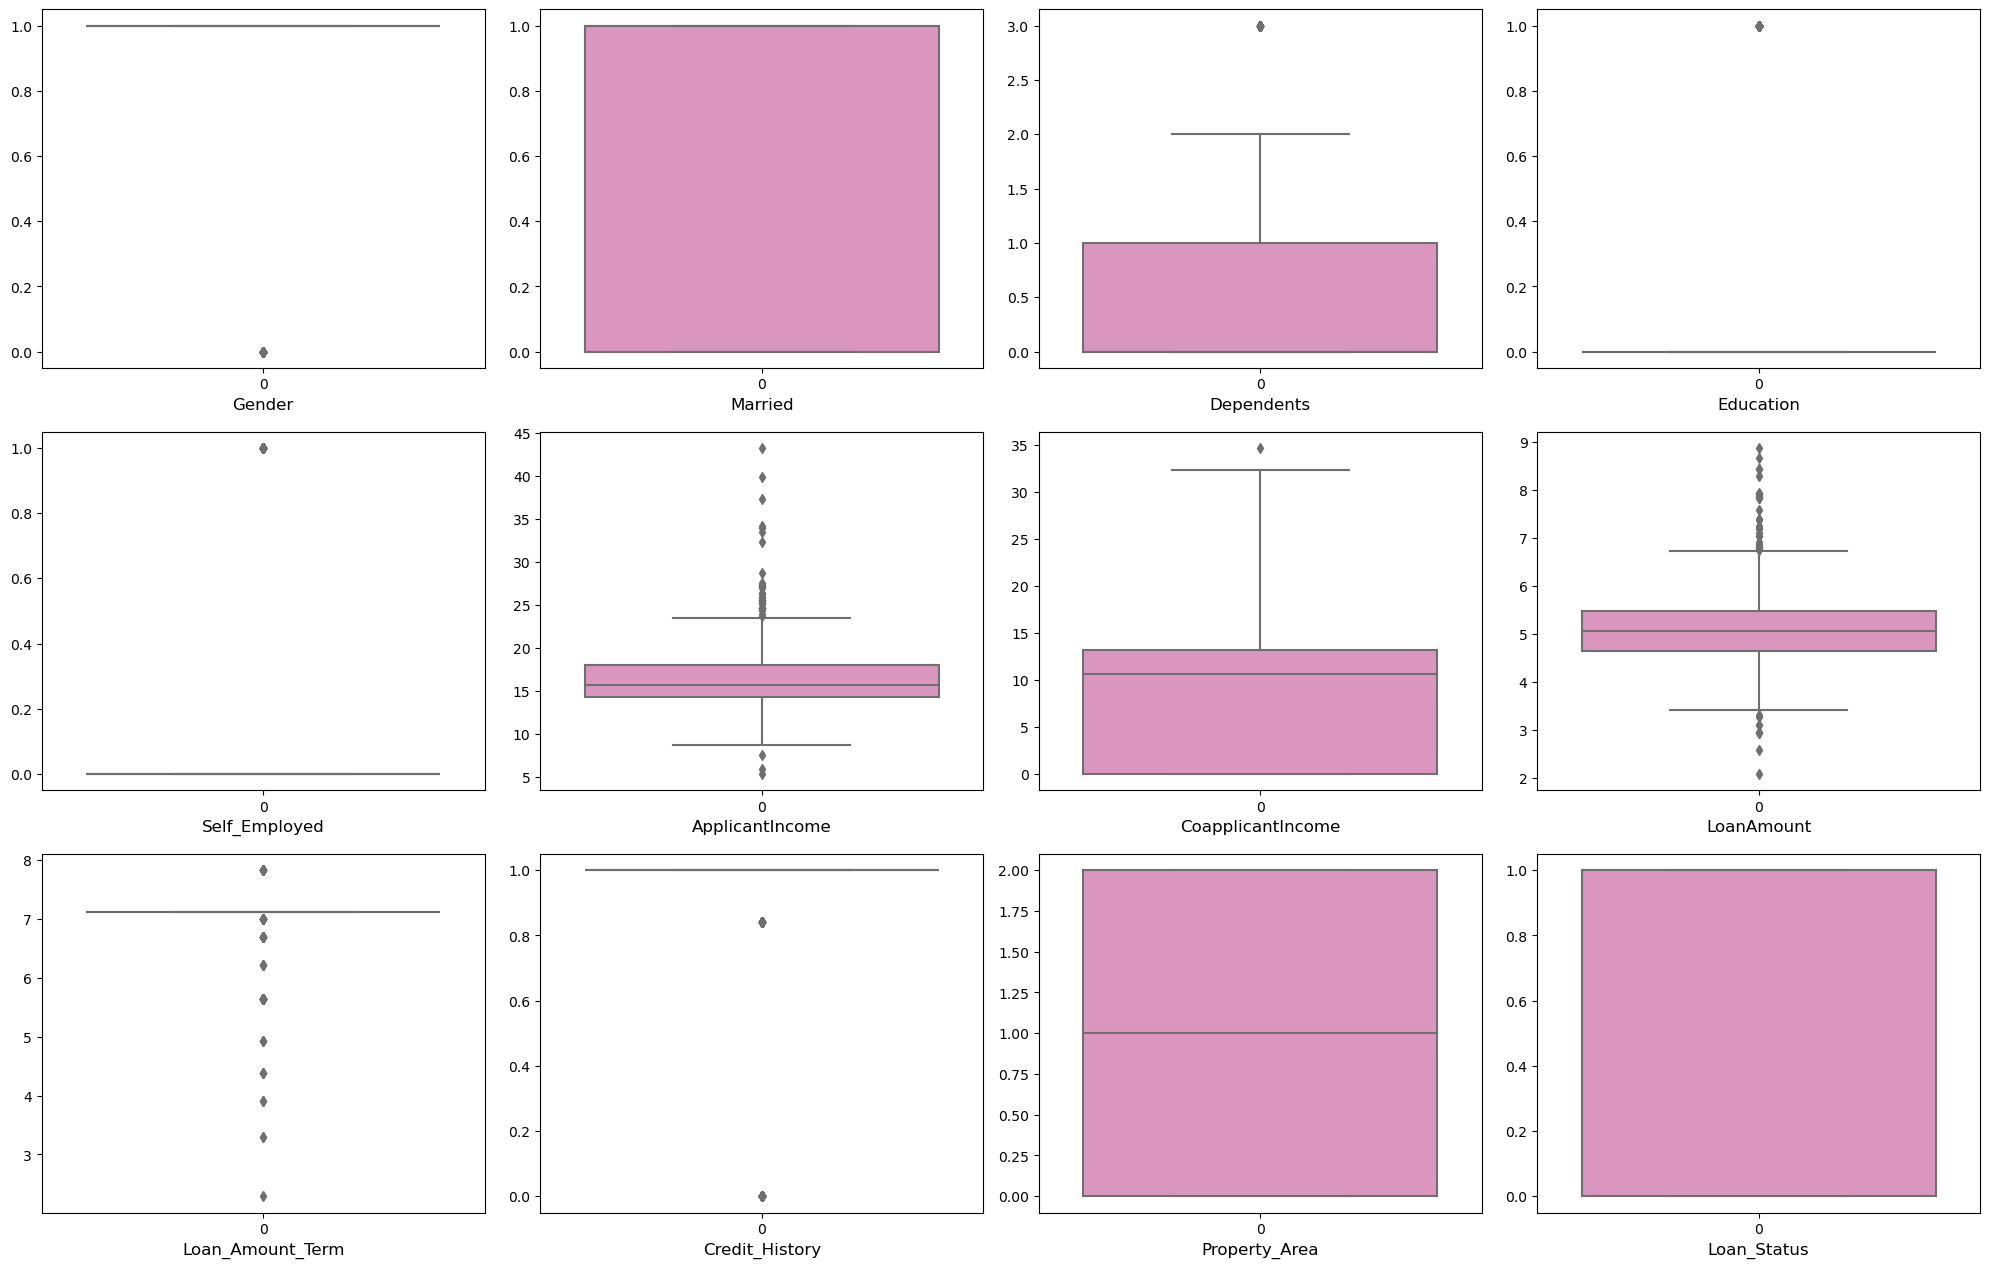

In [23]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4, plotnumber)
        sns.boxplot(df[column], palette = 'Set2_r')
        plt.xlabel(column, fontsize = 12)
        plt.yticks(rotation = 0, fontsize= 10)
    plotnumber +=1
plt.tight_layout()

So we have found outlier in some of the columns. So we will remove the outliers using the zscore and IQR techniques before building the model and selecting the best one.

In [24]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.737806,0.528362,0.392601,0.380325,1.053225,0.169528,0.281947,0.451640,1.223298,0.674519
1,0.472343,0.728816,0.253470,0.528362,0.392601,0.022870,0.561256,0.100752,0.281947,0.451640,1.318513,1.482537
2,0.472343,0.728816,0.737806,0.528362,2.547117,0.533028,1.053225,1.269462,0.281947,0.451640,1.223298,0.674519
3,0.472343,0.728816,0.737806,1.892641,0.392601,0.711341,0.820678,0.226303,0.281947,0.451640,1.223298,0.674519
4,0.472343,1.372089,0.737806,0.528362,0.392601,0.419383,1.053225,0.092554,0.281947,0.451640,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.737806,0.528362,0.392601,0.574203,1.053225,1.152903,0.281947,0.451640,1.318513,0.674519
610,0.472343,0.728816,2.236021,0.528362,0.392601,0.128936,1.053225,1.996700,2.235999,0.451640,1.318513,0.674519
611,0.472343,0.728816,0.253470,0.528362,0.392601,0.899211,0.178302,1.403404,0.281947,0.451640,1.223298,0.674519
612,0.472343,0.728816,1.244745,0.528362,0.392601,0.794146,1.053225,0.693799,0.281947,0.451640,1.223298,0.674519


In [25]:
#putting thrushold = 3 then 99.7% of the data comes under the bell-shaped curve
np.where(z>3)

(array([ 14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 183, 185,
        242, 262, 308, 313, 333, 333, 369, 409, 443, 487, 495, 497, 506,
        523, 546, 561, 568, 575, 581, 585, 600, 604], dtype=int64),
 array([8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 7, 5, 5, 8, 8, 7, 8, 5, 7, 7, 5, 5,
        7, 8, 8, 7, 7, 8, 7, 7, 8, 6, 8, 6, 7], dtype=int64))

In [26]:
#Now we will remove the data above zscore and creating new DF.
df1= df[(z<3).all(axis=1)]
print("New Data Frame:",df1.shape)
print("Old Data Frame:",df.shape)

New Data Frame: (582, 12)
Old Data Frame: (614, 12)


In [27]:
print("Data loss Perc%", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss Perc% 5.211726384364821


This data loss is in acceptable range.

In [28]:
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.373902,0.185866,0.041137,-0.004520,0.051840,0.226509,0.165955,-0.102181,0.020491,-0.022082,0.011717
Married,0.373902,1.000000,0.331888,0.023242,-0.009041,-0.015032,0.309949,0.175152,-0.123167,0.014534,0.013420,0.079691
Dependents,0.185866,0.331888,1.000000,0.068151,0.056119,0.096422,-0.003614,0.127088,-0.083555,-0.015861,0.003804,0.010835
Education,0.041137,0.023242,0.068151,1.000000,-0.010823,-0.182341,0.024339,-0.139592,-0.100828,-0.082867,-0.067049,-0.093325
Self_Employed,-0.004520,-0.009041,0.056119,-0.010823,1.000000,0.224899,-0.070692,0.126298,-0.024717,-0.011521,-0.027306,-0.031113
ApplicantIncome,0.051840,-0.015032,0.096422,-0.182341,0.224899,1.000000,-0.347312,0.468413,-0.051720,0.046255,-0.020535,-0.000754
CoapplicantIncome,0.226509,0.309949,-0.003614,0.024339,-0.070692,-0.347312,1.000000,0.207530,-0.010833,0.000486,-0.069516,0.054170
LoanAmount,0.165955,0.175152,0.127088,-0.139592,0.126298,0.468413,0.207530,1.000000,0.061735,0.007162,-0.087918,-0.038990
Loan_Amount_Term,-0.102181,-0.123167,-0.083555,-0.100828,-0.024717,-0.051720,-0.010833,0.061735,1.000000,0.036194,-0.065379,-0.008092
Credit_History,0.020491,0.014534,-0.015861,-0.082867,-0.011521,0.046255,0.000486,0.007162,0.036194,1.000000,-0.010870,0.560340


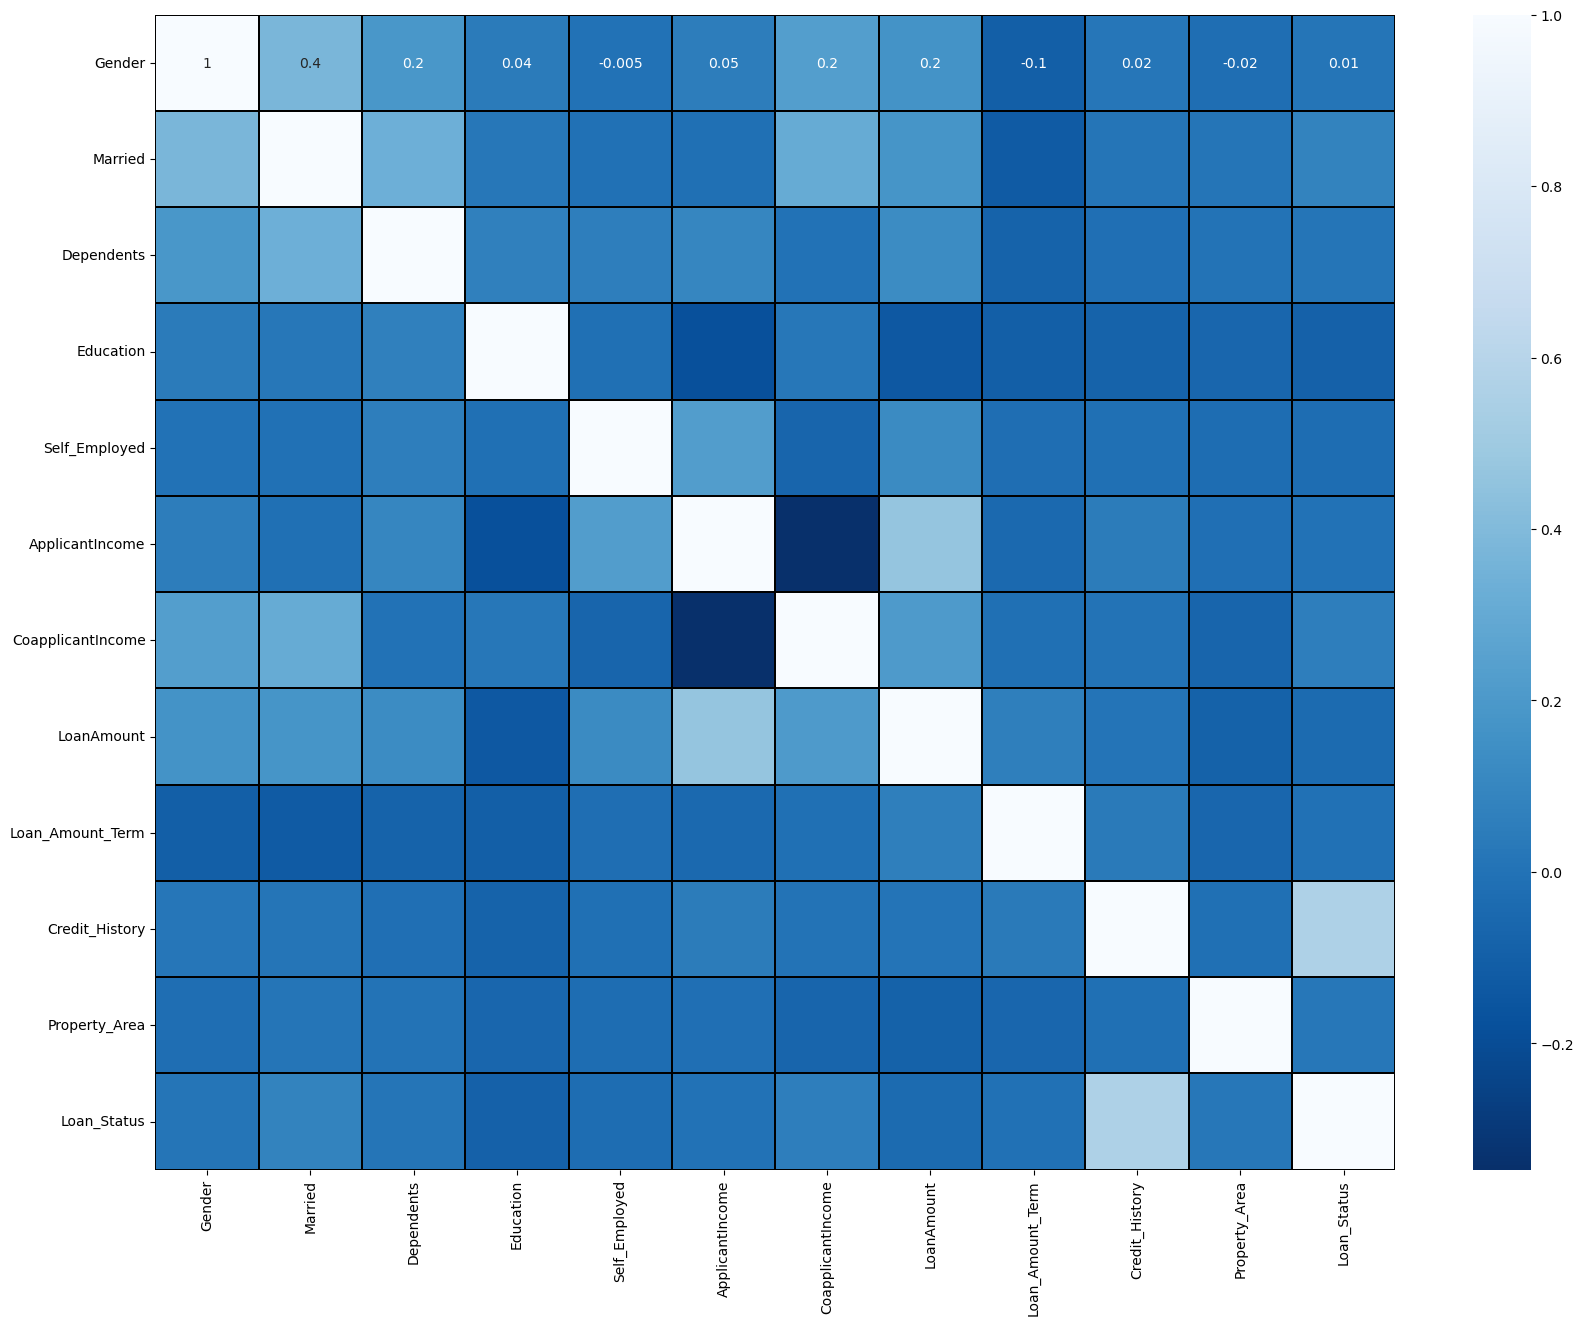

In [29]:
plt.figure(figsize = (20,15))
sns.heatmap(df1.corr(),linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

Note- 0= no relation, -0.3 to +0.3- less corr, greater than +0.5 moderate corr, greater than +0.7 high corr.

In [30]:
from sklearn.preprocessing import StandardScaler

x = df1.drop("Loan_Status", axis=1)  # Select only the remaining numerical columns for scaling
y = df1['Loan_Status']

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [31]:
y.value_counts()

Loan_Status
1    402
0    180
Name: count, dtype: int64

Here we can see the data is not balanced, since it is a classification problem we will balance the data using oversampling method.

In [32]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [33]:
y1.value_counts()

Loan_Status
1    402
0    402
Name: count, dtype: int64

In [34]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu =0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print('Maximum accuracy is ', maxAccu,'On random_state ',maxRS) 

Maximum accuracy is  0.8514285714285714 On random_state  19


In [35]:
#creating tain test split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size= .30, random_state= maxRS)

In [36]:
#CLASSFICATION ALGORITHMS
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [37]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8457142857142858
[[ 27  21]
 [  6 121]]
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        48
           1       0.85      0.95      0.90       127

    accuracy                           0.85       175
   macro avg       0.84      0.76      0.78       175
weighted avg       0.84      0.85      0.84       175



In [38]:
LR  = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.8742857142857143
[[ 27  21]
 [  1 126]]
              precision    recall  f1-score   support

           0       0.96      0.56      0.71        48
           1       0.86      0.99      0.92       127

    accuracy                           0.87       175
   macro avg       0.91      0.78      0.82       175
weighted avg       0.89      0.87      0.86       175



In [39]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.7257142857142858
[[  0  48]
 [  0 127]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.73      1.00      0.84       127

    accuracy                           0.73       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.53      0.73      0.61       175



In [40]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8628571428571429
[[ 28  20]
 [  4 123]]
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        48
           1       0.86      0.97      0.91       127

    accuracy                           0.86       175
   macro avg       0.87      0.78      0.81       175
weighted avg       0.86      0.86      0.85       175



In [41]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8285714285714286
[[ 27  21]
 [  9 118]]
              precision    recall  f1-score   support

           0       0.75      0.56      0.64        48
           1       0.85      0.93      0.89       127

    accuracy                           0.83       175
   macro avg       0.80      0.75      0.77       175
weighted avg       0.82      0.83      0.82       175



In [42]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.8285714285714286
[[ 31  17]
 [ 13 114]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67        48
           1       0.87      0.90      0.88       127

    accuracy                           0.83       175
   macro avg       0.79      0.77      0.78       175
weighted avg       0.82      0.83      0.83       175



In [43]:
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8057142857142857
[[ 26  22]
 [ 12 115]]
              precision    recall  f1-score   support

           0       0.68      0.54      0.60        48
           1       0.84      0.91      0.87       127

    accuracy                           0.81       175
   macro avg       0.76      0.72      0.74       175
weighted avg       0.80      0.81      0.80       175



In [44]:
#Now we will check for cross validation score
from sklearn.model_selection import cross_val_score

In [45]:
score = cross_val_score(RFC, x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predRFC)-score.mean())

[0.72670807 0.74534161 0.8447205  0.86956522 0.91875   ]
0.8210170807453416
Difference between Accuracy score and cross val score is -  0.02469720496894412


In [46]:
score = cross_val_score(LR, x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predLR)-score.mean())

[0.72049689 0.69565217 0.72670807 0.80745342 0.7375    ]
0.7375621118012422
Difference between Accuracy score and cross val score is -  0.13672360248447213


In [47]:
score = cross_val_score(GB, x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predGB)-score.mean())

[0.72670807 0.74534161 0.81987578 0.86956522 0.88125   ]
0.8085481366459627
Difference between Accuracy score and cross val score is -  0.05430900621118018


In [48]:
score = cross_val_score(svc, x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predsvc)-score.mean())

[0.63354037 0.59627329 0.62111801 0.47826087 0.63125   ]
0.5920885093167702
Difference between Accuracy score and cross val score is -  0.1336257763975156


In [49]:
#Hyper Parameter tuning 
#Random forst Classifier 
from sklearn.model_selection import GridSearchCV

parameters = {    'criterion': ['gini', 'entropy'],
    'random_state': [10, 20],
    'max_depth': [None, 10], 
    'n_jobs': [ -1, 1], 
    'n_estimators': [10, 50] 
}  

In [50]:
GCV =GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [51]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10], 'n_estimators': [10, 50],
                         'n_jobs': [-1, 1], 'random_state': [10, 20]})

In [52]:
Final_model = RandomForestClassifier(criterion= 'entropy', max_depth= 10, n_estimators= 50, n_jobs= -2, random_state= 10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

85.71428571428571


So our model is performing well in predicting the loan status, Our model predicting the accuracy score of 85.71%.